<a href="https://colab.research.google.com/github/GeorgeKMaina/HOTEL-BOOKINGS-LOGISTIC-REGRESSION/blob/main/hotel_bookings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOTEL BOOKING ANALYSIS

- To predict if a booking will be cancelled or not

## IMPORTING LIBRARIES

In [1]:
#importing python libraries for data cleaning and manipulation
import pandas as pd
import numpy as np

#importing python libraires for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing librbaires for feature selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#importing python libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# importing python libraries for transforming various columns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# importing python libraries for performance measure
from sklearn.metrics import confusion_matrix

In [2]:
#loading the dataset
hotelbookings=pd.read_csv('/content/hotel_bookings.csv')

#create a copy of the dataset
hotelbooking=hotelbookings.copy()

### PREVIEWING THE DATASET

In [3]:
#looking at the the first three rows of the data
hotelbookings.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [4]:
#looking at the the first three rows of the data
hotelbookings.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
#having a look at the attributes of the data
print('shape of the dataset: ',hotelbookings.shape)
print('size of the daatset: ',hotelbookings.size)
print('dimensions of the dataset: ',hotelbookings.ndim)

shape of the dataset:  (119390, 32)
size of the daatset:  3820480
dimensions of the dataset:  2


In [6]:
# lookin at the info of the data
print('looking at the number of records in the columns and the data types of the columns\n')
hotelbookings.info()

looking at the number of records in the columns and the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64


### Data Cleaning

###### 1. Consistency

In [7]:
print('number of duplicate rows: ',hotelbookings.duplicated().sum())
print('shape of the original dataset: ',hotelbookings.shape)
print('shape of the dataset after droping duplicate rows: ', hotelbookings.drop_duplicates(keep='first').shape)

number of duplicate rows:  31994
shape of the original dataset:  (119390, 32)
shape of the dataset after droping duplicate rows:  (87396, 32)


###### 2. Completeness

In [8]:
#we will look for columns with missing values
missing=hotelbookings.isna().sum()
missing=missing[missing!=0]
print('number of columns with missing values: ', len(missing))

# percentage of missing values in the columns
perc=missing/len(hotelbookings)*100
missing_perc=pd.concat([missing,perc],axis=1)
missing_perc.rename(columns={0:'number of missing values in the column',1:'percentage of missing values in the column'},inplace=True)
missing_perc.sort_values(by='percentage of missing values in the column',ascending=False)

number of columns with missing values:  4


,number of missing values in the column,percentage of missing values in the column
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


##### dealing with missing values

In [9]:
#we will drop the columns company because they have a lot of missing values
hotelbookings.drop(['company'],axis=1,inplace=True)

#to confirm if the column was drooped
hotelbookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# for the column country, we will fill the missing values with those of the most repeated country in that column
from scipy.stats import mode
hotelbookings['country'].fillna(mode(hotelbookings['country']).mode[0],inplace=True)
#for the column agent,we will fill it using bboth backward and forward fill
hotelbookings['agent'].fillna(method='bfill',inplace=True)
#for the column children, we will fill the missing values with the mean of that column
hotelbookings['children'].fillna(np.mean(hotelbookings['children']),inplace=True)

In [11]:
# to confirm if we have dropped and filled the misising values
hotelbookings.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

###### 3. Uniformity and Validity

In [12]:
#removing whitespaces if there are any
hotelbookings.columns.str.strip()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
#renaming the column adr to price 
hotelbookings.rename(columns={'adr':'price'},inplace=True)

In [14]:
# there are two columns babies and children
# we will create a new column and impute it with the sum of babies and children
hotelbookings['children']=pd.to_numeric(hotelbookings['children'],errors='coerce')
hotelbookings['kids']=hotelbookings['babies']+ hotelbookings['children']

#creating a new column total visitors
#will be the sum of visitors
hotelbookings['total_visitors']=hotelbookings['adults']+ hotelbookings['kids']

#we will then drop the columns babies and children from our dataset
hotelbookings.drop(['children','babies'],axis=1,inplace=True)

## EDA

- we will first start by making some filters on the dataset
- they will be of help when exploring the dataset

In [15]:
#we will first filter the dataset to have only records of non-cancelled and cancelled bookings respectively
notcancel=hotelbookings[hotelbookings['is_canceled']==0]
cancelled=hotelbookings[hotelbookings['is_canceled']==1]
#we will also filter to have records of repeated customers only
repeated_customer=hotelbookings[hotelbookings['is_repeated_guest']==1]

### Univariate Analysis

In [16]:
#we will filter the dataset to have numerical values first
numerical=hotelbookings.select_dtypes(exclude='object')

#getting the summary statistics of this columns 
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.0,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0


##### price

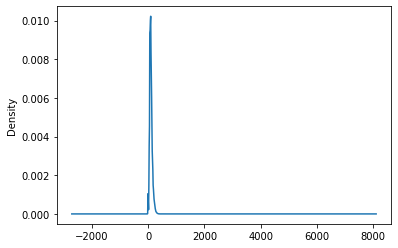

In [17]:
hotelbookings['price'].plot(kind='kde')

#we can see that the median price is below the mean price
#this shows that the data is not normally distributed and has leptokurtic kurtosis

In [18]:
#we can see that we have an abnormaly in the price column
#we cant have a negative price

#we will filter the dataset to see which rows had negative prices
hotelbookings.loc[hotelbookings['price']<0]

#we can see that only one row had a negative price
#which is row 14969

#we will drop the record
hotelbookings.drop(hotelbookings.loc[hotelbookings['price']<0].index,inplace=True)

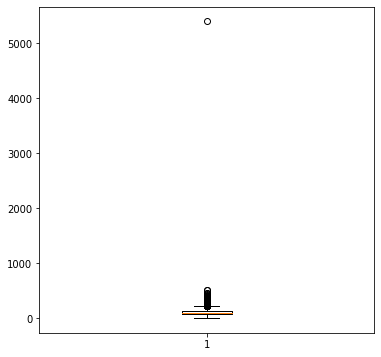

In [19]:
#identifying the outliers in the column price
plt.figure(figsize=(6,6)) 
plt.boxplot(hotelbookings['price'])
plt.show()

#we can see that there are outlier values

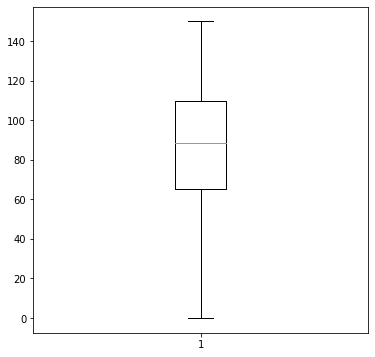

In [20]:
#dropping by the row with outliers by their index
hotelbookings.drop(hotelbookings[hotelbookings['price'] >150].index, inplace = True)

#to confirm if the outlier values have been dropped
plt.figure(figsize=(6,6)) 
plt.boxplot(hotelbookings['price'])
plt.show()

######total visitors in a room

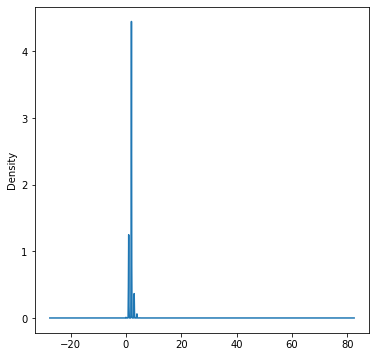

In [21]:
hotelbookings['total_visitors'].plot(kind='kde',figsize=(6,6))
plt.show()

#we can see that this column is not normally distibuted

In [22]:
#we cannot have zero visitors in a hotel room
#we will therefore filter the dataset to ensure that the number of visitors in the hotl room are 1 and above
hotelbookings=hotelbookings[hotelbookings['total_visitors']>0]

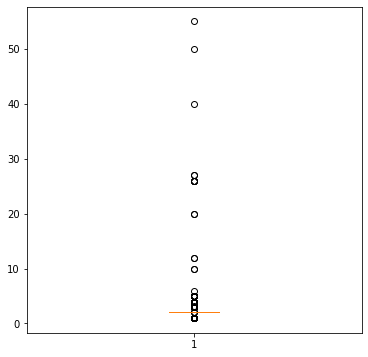

In [23]:
#we will look for outlier values in this column
plt.figure(figsize=(6,6)) 
plt.boxplot(hotelbookings['total_visitors'])
plt.show()

#we will not drop the outlier values
#the outleir values might be actually have some information in them
# corprates groups always have many number of people travelling

#this column will be rescalled inorder to account for the outlier values

##### Lead Days

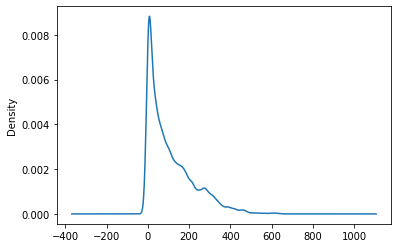

In [24]:
hotelbookings['lead_time'].plot(kind='kde')

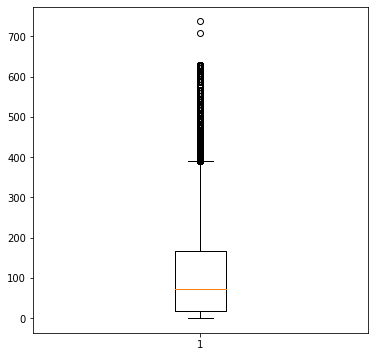

In [25]:
plt.figure(figsize=(6,6)) 
plt.boxplot(hotelbookings['lead_time'])
plt.show()

#we can see that there are outliers in this columns aswell
#we can decide not to drop them and insted rescalle them

##### Reservation Status

In [26]:
hotelbookings['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

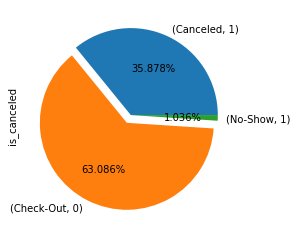

In [27]:
explode=0,0.1,0
hotelbookings.groupby('reservation_status')['is_canceled'].value_counts().plot(kind='pie',autopct='%1.3f%%',explode=explode)
plt.show()

##### hotel

is_canceled       0      1   Total
hotel                             
City Hotel    40510  29435   69945
Resort Hotel  24282   8477   32759
Total         64792  37912  102704
***plottting***


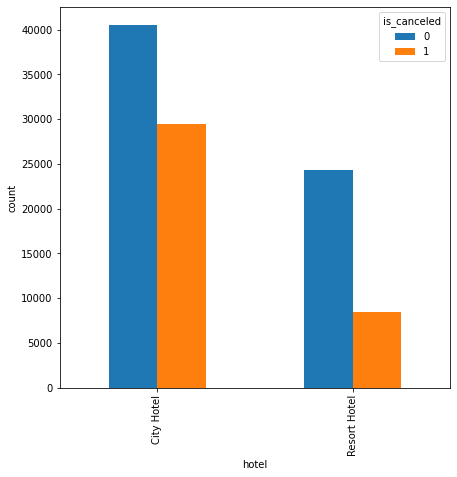

In [28]:
print(pd.crosstab(hotelbookings.hotel,hotelbookings.is_canceled,margins=True,margins_name='Total'))

print('***plottting***')
pd.crosstab(hotelbookings.hotel,hotelbookings.is_canceled).plot(kind='bar',figsize=(7,7))
plt.ylabel('count')
plt.show()

##### meals

hotel      City Hotel  Resort Hotel
meal                               
BB              54579         25294
FB                 42           593
HB               5229          5770
SC              10095            75
Undefined           0          1027
*** plotting***


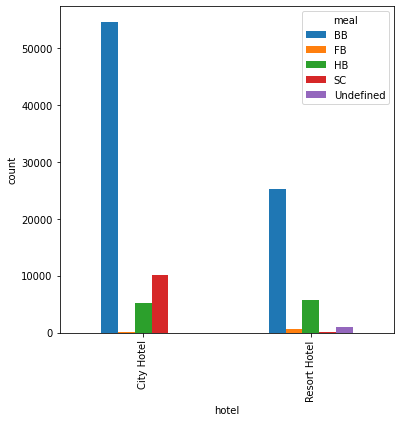

In [29]:
print(pd.crosstab(hotelbookings.meal,hotelbookings.hotel))
print('*** plotting***')
pd.crosstab(hotelbookings.hotel,hotelbookings.meal).plot(kind='bar',figsize=(6,6))
plt.ylabel('count')
plt.show()


#in both hotels, most customers prefer bead and breakfast
#full board is the most unpopular in city hotel while self catering is the most unpopular in the resort hotel

In [30]:
#we will create another column with the total number of nights spent by the visitors
hotelbookings['total_stays_in_nights']=hotelbookings['stays_in_weekend_nights']+hotelbookings['stays_in_week_nights']

meal                      BB   FB    HB    SC  Undefined
total_stays_in_nights                                   
0                        515    1    74    46          9
1                      15075   37   905  2431          9
2                      18393  208  3845  2278        146
3                      18596  194  1675  2411        545
4                      11995   87  1087  1711         72
5                       5095    8   536   591          5
6                       2275   31   290   223         66
7                       4941   49  1662   264        113
8                        661    4   131    67         17
9                        466    3   123    35          2
10                       635    5   242    33          8
11                       225    2    61     7          3
12                       150    1    10     7          9
13                        84    3    10     5          0
*** to plot meal type by the number of nights spent***


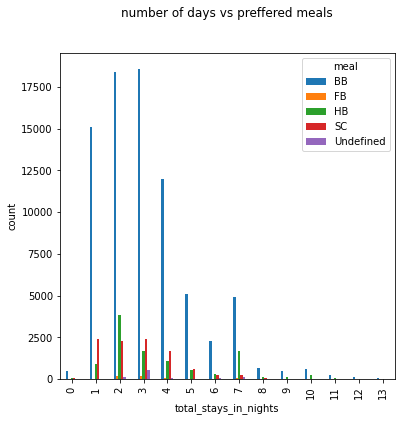

In [31]:
print(pd.crosstab(hotelbookings.total_stays_in_nights,hotelbookings.meal).head(14))

print('*** to plot meal type by the number of nights spent***')

pd.crosstab(hotelbookings.total_stays_in_nights,hotelbookings.meal).head(14).plot(kind='bar',figsize=(6,6))
plt.title('number of days vs preffered meals\n\n')
plt.ylabel('count')
plt.show()


#we can see that bead and breakfast was the most popular meal type across all the number of nights

##### country

is_canceled      0      1
country                  
PRT          18619  25195
GBR           8768   1949
FRA           7330   1487
ESP           5005   1427
ITA           2058   1061
DEU           5576   1004
IRL           2254    676
BRA           1173    670
CHN            472    393
BEL           1586    376
*** country of origin of visitor vs cancellation statues


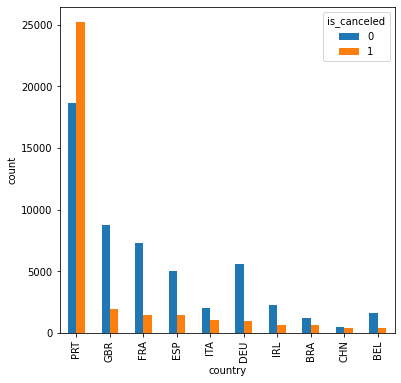

In [32]:
print(pd.crosstab(hotelbookings.country,hotelbookings.is_canceled).nlargest(10,1))

print('*** country of origin of visitor vs cancellation statues')

pd.crosstab(hotelbookings.country,hotelbookings.is_canceled).nlargest(10,1).plot(kind='bar',figsize=(6,6))
plt.ylabel('count')
plt.show()

#we can conclude that most visitors were from Portugal
#this can help us conclude that the host country of the two hotels is portugal

##### arrival month 

arrival date month and cancellation status
is_canceled            0     1
arrival_date_month            
April               5989  4113
August              5252  3291
December            4122  2268
February            5256  2632
January             4063  1783
July                5645  3455
June                5390  3834
March               6409  3025
May                 6225  3884
November            4516  2071
October             6536  4068
September           5389  3488
***plotting arrival date month and cancellation status


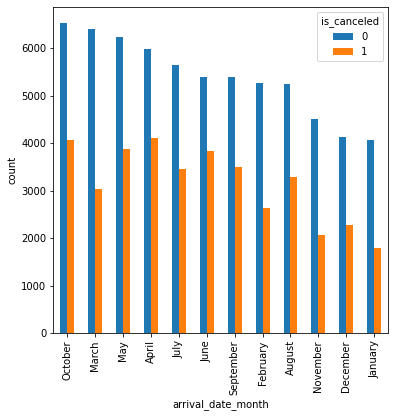

In [33]:
print('arrival date month and cancellation status')
print(pd.crosstab(hotelbookings.arrival_date_month,hotelbookings.is_canceled))

print('***plotting arrival date month and cancellation status')
pd.crosstab(hotelbookings.arrival_date_month,hotelbookings.is_canceled).sort_values(by=0,ascending=False).plot(kind='bar',figsize=(6,6))
plt.ylabel('count')
plt.show()

#the month of october had the least cancellation
#the month of April had the most cancellations

In [34]:
print('arrival date month with the highest number of visits')
pd.crosstab(notcancel.arrival_date_month,notcancel.total_visitors,margins=True,margins_name='Total').sort_values(by='Total',ascending=False)

#we can see that the month of October had the most visitors while that of January had the least visitors

arrival date month with the highest number of visits


total_visitors,0.0,1.0,2.0,3.0,4.0,5.0,10.0,12.0,Total
arrival_date_month,,,,,,,,,
Total,155,16026,49479,7118,2283,103,1,1,75166
August,14,817,5705,1525,549,28,0,0,8638
July,12,841,5222,1368,452,24,0,0,7919
May,11,1522,4967,474,136,4,0,0,7114
October,13,1766,4579,437,115,3,1,0,6914
March,25,1729,4284,484,119,4,0,0,6645
April,5,1304,4449,605,194,8,0,0,6565
June,9,1197,4461,553,178,6,0,0,6404
September,7,1332,4557,362,134,0,0,0,6392


##### market segment

marketting and cancellation status
is_canceled         0      1
market_segment              
Aviation          181     52
Complementary     638     89
Corporate        4229    968
Direct           8133   1371
Groups           7422  11635
Offline TA/TO   15366   7944
Online TA       28823  15851
Undefined           0      2
***plotting segemnts from which marketting the custoemrs came from and cancellation status


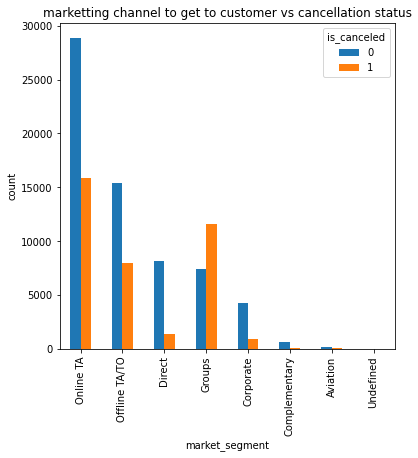

In [35]:
print('marketting and cancellation status')
print(pd.crosstab(hotelbookings.market_segment,hotelbookings.is_canceled))

print('***plotting segemnts from which marketting the custoemrs came from and cancellation status')
pd.crosstab(hotelbookings.market_segment,hotelbookings.is_canceled).sort_values(by=0,ascending=False).plot(kind='bar',figsize=(6,6))
plt.title('marketting channel to get to customer vs cancellation status')
plt.ylabel('count')
plt.show()

#customers reached through Online Travel Agents - online TA - had the highrst number of non cancelled booking
#also this same segemtn had the most number of cancellation compared to the other marketting channels

In [36]:
visitor_type=[]
for i in hotelbookings['country']:
  if i=='PRT':
    visitor_type.append('Local Visitor')
  else:
    visitor_type.append('Foreign Visitor')

hotelbookings['visitor_type']=visitor_type

visitor_type    Foreign Visitor  Local Visitor
market_segment                                
Aviation                    130            103
Complementary                69            658
Corporate                   969           4228
Direct                     4977           4527
Groups                     5738          13319
Offline TA/TO             11848          11462
Online TA                 35159           9515
Undefined                     0              2


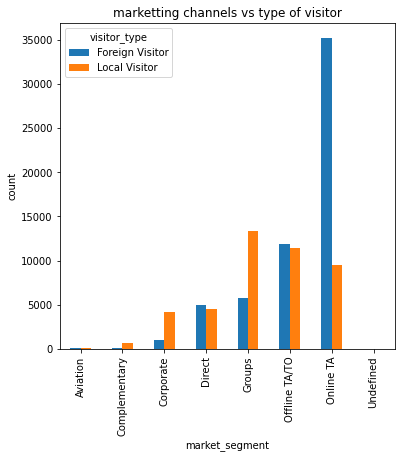

In [37]:
#to know which marketting channel is more popular for local and foreign visitors
print(pd.crosstab(hotelbookings.market_segment,hotelbookings.visitor_type))

pd.crosstab(hotelbookings.market_segment,hotelbookings.visitor_type ).plot(kind='bar',figsize=(6,6))
plt.title('marketting channels vs type of visitor')
plt.ylabel('count')
plt.show()

# the best marketting channel to reach foreign visitors is online TA
#trhe best marketting channel to reach local visitors is groups

##### Is Repeated Guest

hotel              City Hotel  Resort Hotel  Total
is_repeated_guest                                 
1                        2032          1778   3810
Total                    2032          1778   3810
*** plot repeated guest and hotel


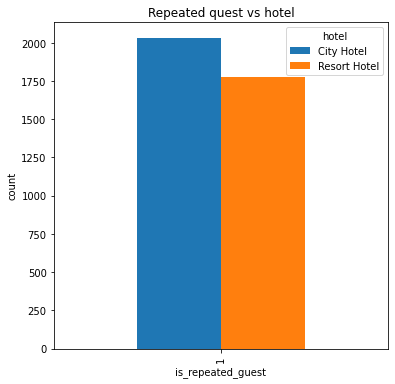

In [38]:
print(pd.crosstab(repeated_customer.is_repeated_guest,repeated_customer.hotel,margins=True,margins_name='Total'))

print('*** plot repeated guest and hotel')
pd.crosstab(repeated_customer.is_repeated_guest,repeated_customer.hotel).plot(kind='bar',figsize=(6,6))
plt.title('Repeated quest vs hotel')
plt.ylabel('count')
plt.show()


#city hotel has the most number of repeated customers

*** plot repeated guest and is cancelled


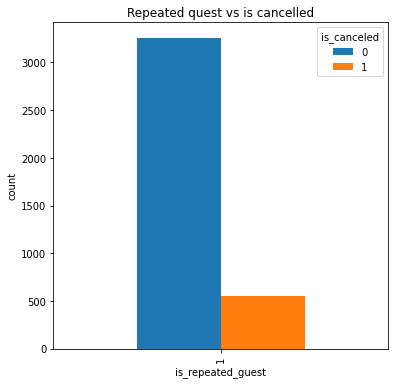

In [39]:
print('*** plot repeated guest and is cancelled')
pd.crosstab(repeated_customer.is_repeated_guest,repeated_customer.is_canceled).plot(kind='bar',figsize=(6,6))
plt.title('Repeated quest vs is cancelled')
plt.ylabel('count')
plt.show()

#most of the repeated guests did not cancel their bookings

##### Reserved Room Type

is_canceled             0      1   Total
reserved_room_type                      
A                   49018  31564   80582
B                     727    345    1072
C                     284    108     392
D                   10020   4289   14309
E                    3273   1136    4409
F                     755    140     895
G                     570    256     826
H                     143     72     215
L                       2      2       4
Total               64792  37912  102704
*** plotting reserved room type and cancellation status


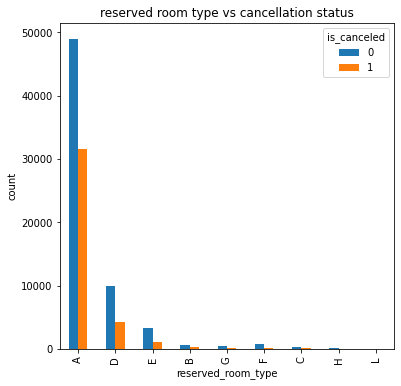

In [40]:
print(pd.crosstab(hotelbookings.reserved_room_type,hotelbookings.is_canceled,margins=True,margins_name='Total'))

print('*** plotting reserved room type and cancellation status')

pd.crosstab(hotelbookings.reserved_room_type,hotelbookings.is_canceled).sort_values(by=1,ascending=False).plot(kind='bar',figsize=(6,6))
plt.title('reserved room type vs cancellation status')
plt.ylabel('count')
plt.show()

# most customers were of the room type A 
#room type had the highest number of cancellations as well as non cancellations

#- there is a question on this
#-how to get percentages

is_canceled             0  Total
reserved_room_type              
A                   52364  52364
B                     750    750
C                     624    624
D                   13099  13099
E                    4621   4621
F                    2017   2017
G                    1331   1331
H                     356    356
L                       4      4
Total               75166  75166


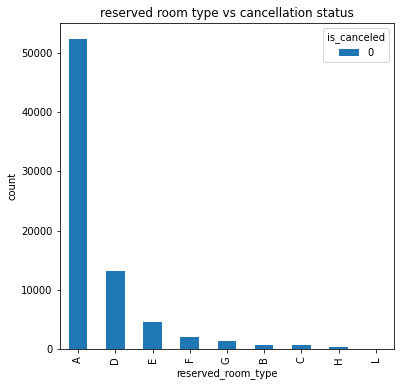

In [41]:
print(pd.crosstab(notcancel.reserved_room_type,notcancel.is_canceled,margins=True,margins_name='Total'))

pd.crosstab(notcancel.reserved_room_type,notcancel.is_canceled).sort_values(by=0, ascending=False).plot(kind='bar',figsize=(6,6))
plt.title('reserved room type vs cancellation status')
plt.ylabel('count')
plt.show()

##### Deposit Type

In [42]:
#we will filter the dataset to have records of cancelled records
cancelled=hotelbookings[hotelbookings['is_canceled']==1]

is_canceled       0      1   Total
deposit_type                      
No Deposit    64575  24052   88627
Non Refund       91  13831   13922
Refundable      126     29     155
Total         64792  37912  102704
*** plotting deposit type and cancellation status


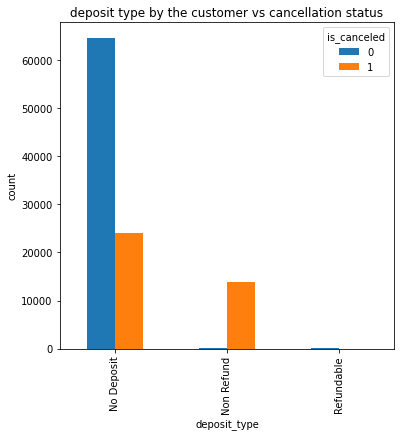

In [43]:
print(pd.crosstab(hotelbookings.deposit_type,hotelbookings.is_canceled,margins=True,margins_name='Total'))

print('*** plotting deposit type and cancellation status')

pd.crosstab(hotelbookings.deposit_type,hotelbookings.is_canceled).sort_values(by=1,ascending=False).plot(kind='bar',figsize=(6,6))
plt.title('deposit type by the customer vs cancellation status')
plt.ylabel('count')
plt.show()

#most of the people who cancelled their bookings did not pay any deposit

In [44]:
#we can also want to see what type of deposit most foreigners paid
foreigners=hotelbookings[hotelbookings['visitor_type']=='Foreign Visitor']

visitor_type  Foreign Visitor  Total
deposit_type                        
No Deposit              58393  58393
Non Refund                387    387
Refundable                110    110
Total                   58890  58890
*** plotting deposit type and cancellation status


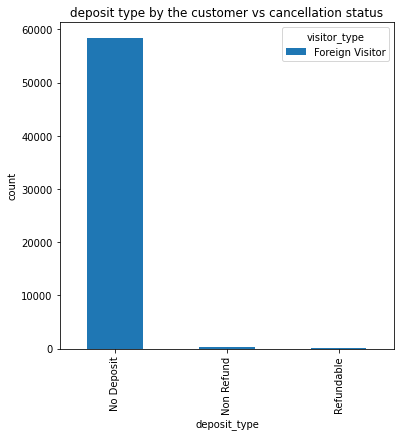

In [45]:
print(pd.crosstab(foreigners.deposit_type,foreigners.visitor_type,margins=True,margins_name='Total'))

print('*** plotting deposit type and cancellation status')

pd.crosstab(foreigners.deposit_type,foreigners.visitor_type).plot(kind='bar',figsize=(6,6))
plt.title('deposit type by the customer vs cancellation status')
plt.ylabel('count')
plt.show()

#most foreign customers did not pay any deposit

## Multivariate Analysis

In [46]:
#we will use LDa
#this is because the type of regression we are tying to carry out in the study is a supervised regression model
#LDA will help us know which features are best in explaining whether a booking will be cancelled or not#

In [47]:
#we will start by label encding some of the categorical columns
le=LabelEncoder()
hotelbookings['hotel']=le.fit_transform(hotelbookings['hotel'])
hotelbookings['meal']=le.fit_transform(hotelbookings['meal'])
hotelbookings['market_segment']=le.fit_transform(hotelbookings['market_segment'])
hotelbookings['reserved_room_type']=le.fit_transform(hotelbookings['reserved_room_type'])
hotelbookings['assigned_room_type']=le.fit_transform(hotelbookings['assigned_room_type'])
hotelbookings['deposit_type']=le.fit_transform(hotelbookings['deposit_type'])
hotelbookings['customer_type']=le.fit_transform(hotelbookings['customer_type'])
hotelbookings['reservation_status']=le.fit_transform(hotelbookings['reservation_status'])
hotelbookings['visitor_type']=le.fit_transform(hotelbookings['visitor_type'])
hotelbookings['arrival_date_month']=le.fit_transform(hotelbookings['arrival_date_month'])
hotelbookings['distribution_channel']=le.fit_transform(hotelbookings['distribution_channel'])


In [48]:

#we will use minmax scaller on some of the numerical columns
#rescale total visitor column
mms=MinMaxScaler()
tvisitor = hotelbookings['total_visitors'].values.reshape(-1, 1) #returns a numpy array
tv_scalled = mms.fit_transform(tvisitor)
hotelbookings['total_visitors'] = tv_scalled

#rescale lead time
ltime = hotelbookings['lead_time'].values.reshape(-1, 1) #returns a numpy array
ltime_scalled = mms.fit_transform(ltime)
hotelbookings['lead_time'] = tv_scalled

In [59]:
#defining our x and y variables
X=hotelbookings.drop(['is_canceled','country','reservation_status_date'],axis=1)
y=hotelbookings['is_canceled']

In [60]:
#We will pefrom LDA and get its results
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

array([[-6.78768024e-01,  6.28445073e-01,  2.32199298e-01,
        -1.27788318e-02, -1.20471490e-03,  7.84933017e-03,
         1.70688053e-01,  4.33778664e-02, -3.90991571e-02,
         1.57388444e-02,  5.66465578e-01, -3.35470947e-01,
        -6.06992900e-01,  1.15243700e-01, -5.66042451e-02,
         2.27600888e-01, -2.04499620e-01, -1.71002710e-01,
         1.55196351e+00, -3.73534441e-04, -4.46943817e-03,
        -1.06717055e-01,  1.18872631e-03, -1.55644012e+00,
        -4.75418061e-01, -2.31083888e+01,  2.13341033e-01,
         6.28445073e-01,  5.03934525e-02,  2.38097280e+00]])

In [61]:
#the reults are in array type
#we will convert them into a dataframe
result=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0])
result.rename(columns={0:'coefficients from LDA'},inplace=True)
result.sort_values(by='coefficients from LDA',ascending=False)

,coefficients from LDA
visitor_type,2.380973
deposit_type,1.551964
lead_time,0.628445
total_visitors,0.628445
market_segment,0.566466
arrival_date_year,0.232199
reserved_room_type,0.227601
kids,0.213341
stays_in_weekend_nights,0.170688
previous_cancellations,0.115244


# Sampling

In [64]:
sample = hotelbookings.groupby('is_canceled', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

In [65]:
sample.is_canceled.value_counts()

0    6479
1    3791
Name: is_canceled, dtype: int64

In [68]:
hotelbookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'price',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids',
       'total_visitors', 'total_stays_in_nights', 'visitor_type'],
      dtype='object')

# Logistic Regression

In [70]:
#Defining our new X variables
X=sample[['visitor_type','price','arrival_date_month','deposit_type','lead_time','total_visitors','market_segment','reserved_room_type','previous_cancellations']].values
y=sample[['is_canceled']].values

#Train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#calling the function
le=LogisticRegression()
le.fit(X_train, y_train)
#predict
y_pred=le.predict(X_test)
#Compare and show
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
2049,0,0
2050,0,0
2051,0,1
2052,0,0


In [71]:
#Evaluate the performance of the model
score_metric=le.score(X_test,y_test)
print('Model Accuracy: %.2f%%' %(score_metric*100) )

print('********')
confusionMatrix=confusion_matrix(y_test,y_pred)
confusionMatrix

Model Accuracy: 75.90%
********


array([[1167,   97],
       [ 398,  392]])